Considering a part of IRIS-dataset as shown in Table – 01
(a) Write a code to find out all the principal components for the data shown in Table-01.
(b) Show the scatter plot of the mean centered data
(c) On same plot, show all the principal components obtained in (a)
(d) Project all the samples to first principal component and show the projected samples with * mark along 1st PCA.
(e) Write a function to compute number of required PCA that can capture p% (p = 96%, 97%, or 98%) variance of the original samples.

In [17]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load data from the CSV file
data1 = pd.read_csv('./IRIS.csv')

# Extract relevant columns (adjust according to your actual data structure)
data = {
    'sepal_width': data1['sepal_width'],  # Update to match the columns you need
    'petal_width': data1['petal_width'],
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Applying PCA
pca = PCA(n_components=2)  # Number of components should be <= number of features
principal_components = pca.fit_transform(scaled_data)

# Creating a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Display the principal components
print("Principal Components:\n", principal_df)


Principal Components:
      Principal Component 1  Principal Component 2
0                -1.658189              -0.198640
1                -0.840056              -1.016773
2                -1.167310              -0.689520
3                -1.003683              -0.853147
4                -1.821816              -0.035013
..                     ...                    ...
145               1.112218               0.935501
146               1.558489              -0.254494
147               0.833321               0.656605
148               0.457711               1.590007
149               0.647390               0.470674

[150 rows x 2 columns]


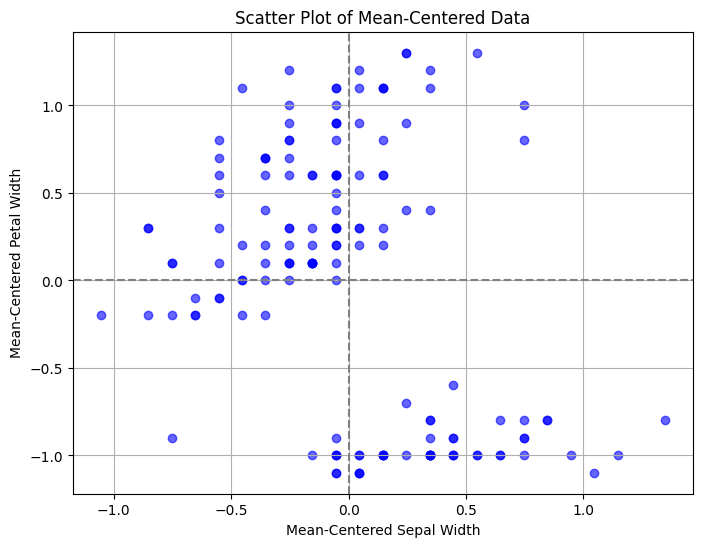

In [18]:
# b) Plot the principal components 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load data from the CSV file
data1 = pd.read_csv('./IRIS.csv')

# Extract relevant columns
data = {
    'sepal_width': data1['sepal_width'],
    'petal_width': data1['petal_width'],
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate the mean of each feature
mean_sepal_width = df['sepal_width'].mean()
mean_petal_width = df['petal_width'].mean()

# Mean-centering the data
mean_centered_data = df - [mean_sepal_width, mean_petal_width]

# Plotting the mean-centered data
plt.figure(figsize=(8, 6))
plt.scatter(mean_centered_data['sepal_width'], mean_centered_data['petal_width'], color='blue', alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Scatter Plot of Mean-Centered Data')
plt.xlabel('Mean-Centered Sepal Width')
plt.ylabel('Mean-Centered Petal Width')
plt.grid(True)
plt.show()


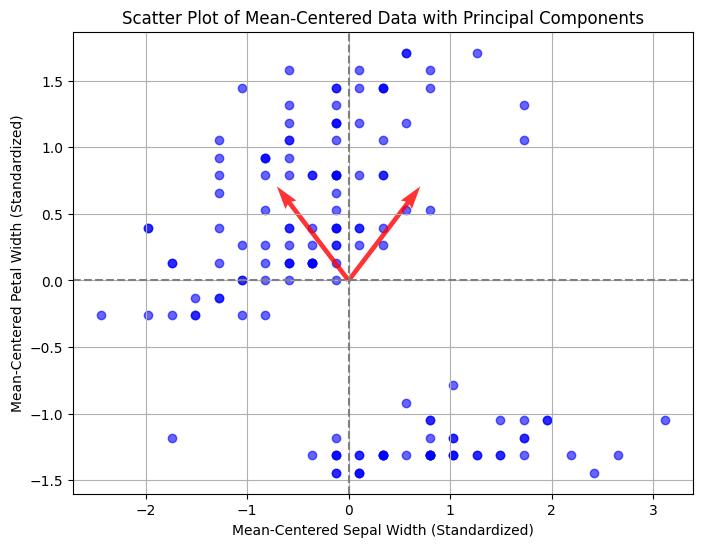

In [19]:
# c) find out all the principal components for the data shown in Table a
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load data from the CSV file
data1 = pd.read_csv('./IRIS.csv')

# Extract relevant columns
data = {
    'sepal_width': data1['sepal_width'],
    'petal_width': data1['petal_width'],
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Applying PCA
pca = PCA(n_components=2)  # Number of components should be <= number of features
principal_components = pca.fit_transform(scaled_data)

# Getting the principal components vectors
pc_vectors = pca.components_

# Mean-centering the data (equivalent to scaled_data after StandardScaler)
mean_centered_data = scaled_data

# Plotting the mean-centered data
plt.figure(figsize=(8, 6))
plt.scatter(mean_centered_data[:, 0], mean_centered_data[:, 1], color='blue', alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')

# Plotting the principal components
for i in range(len(pc_vectors)):
    plt.quiver(0, 0, pc_vectors[i, 0], pc_vectors[i, 1], angles='xy', scale_units='xy', scale=1, color='red', alpha=0.8)

# Formatting the plot
plt.title('Scatter Plot of Mean-Centered Data with Principal Components')
plt.xlabel('Mean-Centered Sepal Width (Standardized)')
plt.ylabel('Mean-Centered Petal Width (Standardized)')
plt.grid(True)
plt.show()


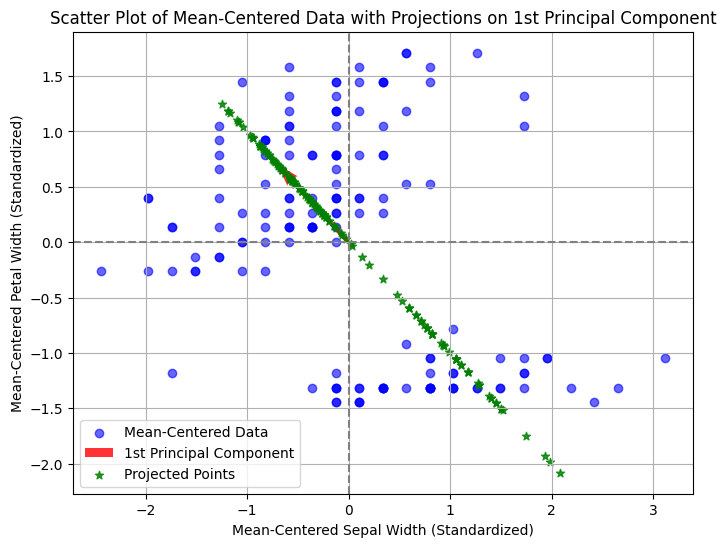

In [20]:
# (d) Project samples to first principal component
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load data from the CSV file
data1 = pd.read_csv('./IRIS.csv')

# Extract relevant columns
data = {
    'sepal_width': data1['sepal_width'],
    'petal_width': data1['petal_width'],
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Applying PCA
pca = PCA(n_components=2)  # Using both components to plot, but will project on the first one
principal_components = pca.fit_transform(scaled_data)

# Extract the first principal component vector
pc1_vector = pca.components_[0]  # First principal component

# Projecting the data onto the first principal component
pc1_projection = np.dot(scaled_data, pc1_vector.reshape(-1, 1))

# Creating a DataFrame for the projected points on the first principal component
projected_points = pc1_projection * pc1_vector

# Plotting the mean-centered data
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], color='blue', alpha=0.6, label='Mean-Centered Data')
plt.axhline(y=0, color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')

# Plotting the principal components
plt.quiver(0, 0, pc1_vector[0], pc1_vector[1], angles='xy', scale_units='xy', scale=1, color='red', alpha=0.8, label='1st Principal Component')

# Plotting the projections of samples on the first principal component
plt.scatter(projected_points[:, 0], projected_points[:, 1], color='green', alpha=0.8, marker='*', label='Projected Points')

# Formatting the plot
plt.title('Scatter Plot of Mean-Centered Data with Projections on 1st Principal Component')
plt.xlabel('Mean-Centered Sepal Width (Standardized)')
plt.ylabel('Mean-Centered Petal Width (Standardized)')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
# (e) Function to compute number of required PCA capturing p% variance
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def compute_required_pca(dataframe, p):
    """
    Compute the number of principal components required to capture at least p% of variance.
    
    Parameters:
    dataframe (pd.DataFrame): The input data.
    p (float): The percentage of variance to capture (between 0 and 100).
    
    Returns:
    int: The number of principal components required.
    """
    # Standardizing the features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(dataframe)
    
    # Applying PCA without specifying n_components to get all components
    pca = PCA()
    pca.fit(scaled_data)
    
    # Calculate cumulative variance explained by each component
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_) * 100
    
    # Find the number of components required to reach at least p% variance
    num_components = np.argmax(cumulative_variance >= p) + 1
    
    return num_components

# Example usage:
# Load data from the CSV file
data1 = pd.read_csv('./IRIS.csv')

# Extract relevant columns
data = {
    'sepal_width': data1['sepal_width'],
    'petal_width': data1['petal_width'],
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate number of components needed for 96%, 97%, and 98% variance
p_values = [96, 97, 98]
for p in p_values:
    num_components = compute_required_pca(df, p)
    print(f"Number of components required to capture {p}% variance: {num_components}")


Number of components required to capture 96% variance: 2
Number of components required to capture 97% variance: 2
Number of components required to capture 98% variance: 2


Q2)


In [22]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load data from the CSV file
data1 = pd.read_csv('./IRIS.csv')

# Extract relevant columns (adjust according to your actual data structure)
data = {
    'sepal_width': data1['sepal_width'],  # Update to match the columns you need
    'petal_length': data1['petal_length'],
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Applying PCA
pca = PCA(n_components=2)  # Number of components should be <= number of features
principal_components = pca.fit_transform(scaled_data)

# Creating a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Display the principal components
print("Principal Components:\n", principal_df)


Principal Components:
      Principal Component 1  Principal Component 2
0                 1.678197              -0.218648
1                 0.860064              -1.036781
2                 1.227528              -0.749738
3                 0.983481              -0.832944
4                 1.841824              -0.055022
..                     ...                    ...
145              -0.667920               0.491204
146              -1.405633              -0.407350
147              -0.667920               0.491204
148              -0.093834               1.226130
149              -0.627710               0.450993

[150 rows x 2 columns]


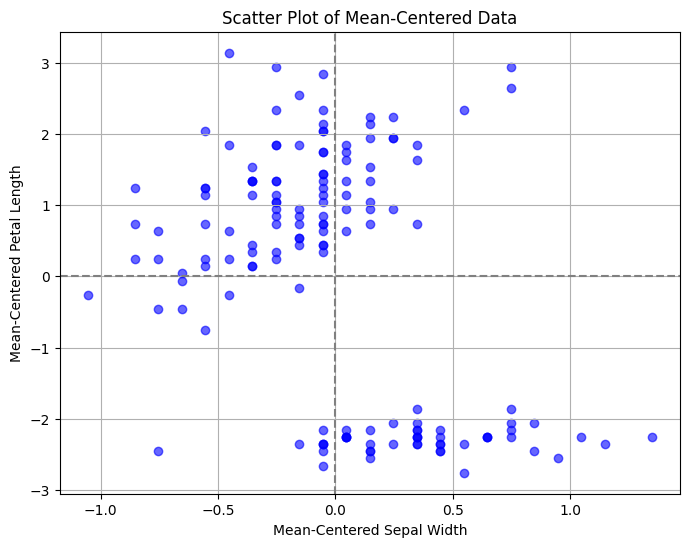

In [23]:
# b) Plot the principal components 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load data from the CSV file
data1 = pd.read_csv('./IRIS.csv')

# Extract relevant columns
data = {
    'sepal_width': data1['sepal_width'],
    'petal_length': data1['petal_length'],
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate the mean of each feature
mean_sepal_width = df['sepal_width'].mean()
mean_petal_width = df['petal_length'].mean()

# Mean-centering the data
mean_centered_data = df - [mean_sepal_width, mean_petal_width]

# Plotting the mean-centered data
plt.figure(figsize=(8, 6))
plt.scatter(mean_centered_data['sepal_width'], mean_centered_data['petal_length'], color='blue', alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Scatter Plot of Mean-Centered Data')
plt.xlabel('Mean-Centered Sepal Width')
plt.ylabel('Mean-Centered Petal Length')
plt.grid(True)
plt.show()


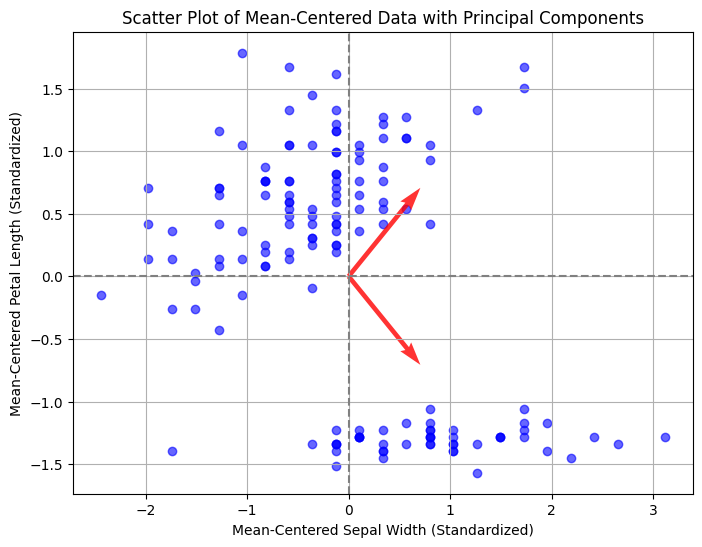

In [24]:
# c) find out all the principal components for the data shown in Table a
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load data from the CSV file
data1 = pd.read_csv('./IRIS.csv')

# Extract relevant columns
data = {
    'sepal_width': data1['sepal_width'],
    'petal_length': data1['petal_length'],
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Applying PCA
pca = PCA(n_components=2)  # Number of components should be <= number of features
principal_components = pca.fit_transform(scaled_data)

# Getting the principal components vectors
pc_vectors = pca.components_

# Mean-centering the data (equivalent to scaled_data after StandardScaler)
mean_centered_data = scaled_data

# Plotting the mean-centered data
plt.figure(figsize=(8, 6))
plt.scatter(mean_centered_data[:, 0], mean_centered_data[:, 1], color='blue', alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')

# Plotting the principal components
for i in range(len(pc_vectors)):
    plt.quiver(0, 0, pc_vectors[i, 0], pc_vectors[i, 1], angles='xy', scale_units='xy', scale=1, color='red', alpha=0.8)

# Formatting the plot
plt.title('Scatter Plot of Mean-Centered Data with Principal Components')
plt.xlabel('Mean-Centered Sepal Width (Standardized)')
plt.ylabel('Mean-Centered Petal Length (Standardized)')
plt.grid(True)
plt.show()


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load data from the CSV file
data1 = pd.read_csv('./Iris.csv')

# Extract relevant columns
data = {
    'PetalLength': data1['PetalLengthCm'],
    'SepalWidth': data1['SepalWidthCm'],
}

# Convert to DataFrame
df = pd.DataFrame(data)
# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Applying PCA
pca = PCA(n_components=2)  # Using both components to plot, but will project on the first one
principal_components = pca.fit_transform(scaled_data)

# Extract the first principal component vector
pc1_vector = pca.components_[0]  # First principal component

# Projecting the data onto the first principal component
pc1_projection = np.dot(scaled_data, pc1_vector.reshape(-1, 1))

# Creating a DataFrame for the projected points on the first principal component
projected_points = pc1_projection * pc1_vector

# Plotting the mean-centered data
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], color='blue', alpha=0.6, label='Mean-Centered Data')
plt.axhline(y=0, color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')

# Plotting the principal components
plt.quiver(0, 0, pc1_vector[0], pc1_vector[1], angles='xy', scale_units='xy', scale=1, color='red', alpha=0.8, label='1st Principal Component')

# Plotting the projections of samples on the first principal component
plt.scatter(projected_points[:, 0], projected_points[:, 1], color='green', alpha=0.8, marker='*', label='Projected Points')

# Formatting the plot
plt.title('Scatter Plot of Mean-Centered Data with Projections on 1st Principal Component')
plt.xlabel('Mean-Centered Sepal Width (Standardized)')
plt.ylabel('Mean-Centered Petal Width (Standardized)')
plt.legend()
plt.grid(True)
plt.show()


AttributeError: module 'matplotlib' has no attribute 'figure'

In [26]:
# (e) Function to compute number of required PCA capturing p% variance
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def compute_required_pca(dataframe, p):
    """
    Compute the number of principal components required to capture at least p% of variance.
    
    Parameters:
    dataframe (pd.DataFrame): The input data.
    p (float): The percentage of variance to capture (between 0 and 100).
    
    Returns:
    int: The number of principal components required.
    """
    # Standardizing the features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(dataframe)
    
    # Applying PCA without specifying n_components to get all components
    pca = PCA()
    pca.fit(scaled_data)
    
    # Calculate cumulative variance explained by each component
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_) * 100
    
    # Find the number of components required to reach at least p% variance
    num_components = np.argmax(cumulative_variance >= p) + 1
    
    return num_components

# Calculate number of components needed for 96%, 97%, and 98% variance
p_values = [96, 97, 98]
for p in p_values:
    num_components = compute_required_pca(df, p)
    print(f"Number of components required to capture {p}% variance: {num_components}")


Number of components required to capture 96% variance: 2
Number of components required to capture 97% variance: 2
Number of components required to capture 98% variance: 2


Q3. (a)Write a code compute all the PCAs in normal form.
(b) How many PCs are required to capture 95% of the total variance.
(c) Project the samples to the PCs obtained in (b) and show their scatter plot.

In [14]:
# a) Write a code compute all the PCAs in normal form.
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Standardize the features
X_std = StandardScaler().fit_transform(X)

# Compute all the principal components
pca = PCA()
principal_components = pca.fit_transform(X_std)

# Print the principal components
for i in range(pca.n_components_):
    print(f"Principal Component {i+1}: {pca.components_[i]}")

Principal Component 1: [ 0.52106591 -0.26934744  0.5804131   0.56485654]
Principal Component 2: [0.37741762 0.92329566 0.02449161 0.06694199]
Principal Component 3: [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
Principal Component 4: [-0.26128628  0.12350962  0.80144925 -0.52359713]


In [15]:
# b) How many PCs are required to capture 95% of the total variance.
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(X_std)
print(f"Number of PCs required to capture 95% of the total variance: {pca.n_components_}")

Number of PCs required to capture 95% of the total variance: 2


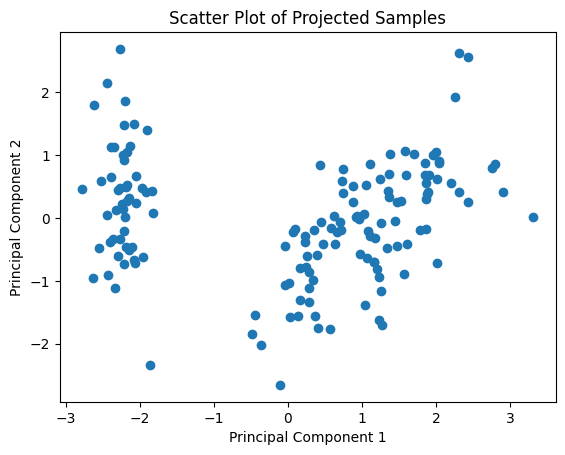

In [16]:
# c) Project the samples to the PCs obtained in (b) and show their scatter plot.

# Project the samples to the PCs
projected_samples = np.dot(X_std, pca.components_.T)

# Scatter plot of the projected samples
plt.scatter(projected_samples[:, 0], projected_samples[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Projected Samples')
plt.show()
